<a href="https://colab.research.google.com/github/Jasmine-kaur8/Flight_price_prediction_project/blob/main/Flight_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import files
uploaded = files.upload()

Saving flights_data.csv to flights_data (1).csv


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('flights_data.csv')
data.head()

,Unnamed: 0,AIRLINE NAME,SOURCE,DESTINATIION,DEPARTURE TIME,ARRIVAL TIME,DATE,MONTH,YEAR,DURATION,TOTAL STOPS,PRICE
0,0,SpiceJet,New Delhi,Mumbai,19:00,10:35\n+ 1 day,29,11,2021,15h 35m,1 Stop,"5,635"
1,1,Air Asia,New Delhi,Mumbai,20:00,02:25\n+ 1 day,29,11,2021,6h 25m,1 Stop,"5,953"
2,2,Air Asia,New Delhi,Mumbai,20:45,07:15\n+ 1 day,29,11,2021,10h 30m,1 Stop,"5,953"
3,3,Air Asia,New Delhi,Mumbai,12:40,02:25\n+ 1 day,29,11,2021,13h 45m,1 Stop,"5,953"
4,4,Air Asia,New Delhi,Mumbai,12:10,02:25\n+ 1 day,29,11,2021,14h 15m,1 Stop,"5,953"


In [31]:
data.isna().sum()

Unnamed: 0        0
AIRLINE NAME      0
SOURCE            0
DESTINATIION      0
DEPARTURE TIME    0
ARRIVAL TIME      0
DATE              0
MONTH             0
YEAR              0
DURATION          0
TOTAL STOPS       0
PRICE             0
dtype: int64

In [32]:
data.shape

(525, 12)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      525 non-null    int64 
 1   AIRLINE NAME    525 non-null    object
 2   SOURCE          525 non-null    object
 3   DESTINATIION    525 non-null    object
 4   DEPARTURE TIME  525 non-null    object
 5   ARRIVAL TIME    525 non-null    object
 6   DATE            525 non-null    int64 
 7   MONTH           525 non-null    int64 
 8   YEAR            525 non-null    int64 
 9   DURATION        525 non-null    object
 10  TOTAL STOPS     525 non-null    object
 11  PRICE           525 non-null    object
dtypes: int64(4), object(8)
memory usage: 49.3+ KB


In [34]:
data['ARRIVAL TIME'] = data['ARRIVAL TIME'].str.split(' ').str[0]
data.head()

,Unnamed: 0,AIRLINE NAME,SOURCE,DESTINATIION,DEPARTURE TIME,ARRIVAL TIME,DATE,MONTH,YEAR,DURATION,TOTAL STOPS,PRICE
0,0,SpiceJet,New Delhi,Mumbai,19:00,10:35\n+,29,11,2021,15h 35m,1 Stop,"5,635"
1,1,Air Asia,New Delhi,Mumbai,20:00,02:25\n+,29,11,2021,6h 25m,1 Stop,"5,953"
2,2,Air Asia,New Delhi,Mumbai,20:45,07:15\n+,29,11,2021,10h 30m,1 Stop,"5,953"
3,3,Air Asia,New Delhi,Mumbai,12:40,02:25\n+,29,11,2021,13h 45m,1 Stop,"5,953"
4,4,Air Asia,New Delhi,Mumbai,12:10,02:25\n+,29,11,2021,14h 15m,1 Stop,"5,953"


In [35]:
data['ARRIVAL TIME'] = data['ARRIVAL TIME'].str.replace('\n','')
data['ARRIVAL TIME'] = data['ARRIVAL TIME'].str.replace('+','')
data.head()

,Unnamed: 0,AIRLINE NAME,SOURCE,DESTINATIION,DEPARTURE TIME,ARRIVAL TIME,DATE,MONTH,YEAR,DURATION,TOTAL STOPS,PRICE
0,0,SpiceJet,New Delhi,Mumbai,19:00,10:35,29,11,2021,15h 35m,1 Stop,"5,635"
1,1,Air Asia,New Delhi,Mumbai,20:00,02:25,29,11,2021,6h 25m,1 Stop,"5,953"
2,2,Air Asia,New Delhi,Mumbai,20:45,07:15,29,11,2021,10h 30m,1 Stop,"5,953"
3,3,Air Asia,New Delhi,Mumbai,12:40,02:25,29,11,2021,13h 45m,1 Stop,"5,953"
4,4,Air Asia,New Delhi,Mumbai,12:10,02:25,29,11,2021,14h 15m,1 Stop,"5,953"


In [38]:
data['TOTAL STOPS'] = data['TOTAL STOPS'].replace('Non Stop', '0 stop')

In [39]:
data['STOP'] = data['TOTAL STOPS'].str.split(' ').str[0]
data.drop(columns = 'TOTAL STOPS', axis = 1, inplace = True)

In [42]:
data['STOP'] = data['STOP'].astype(int)

In [44]:
data['STOP'].value_counts()

1    324
0    161
2     37
3      3
Name: STOP, dtype: int64

In [45]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [47]:
data['ARRIVAL HOUR']     = data['ARRIVAL TIME'].str.split(':').str[0]
data['ARRIVAL MINUTE']   = data['ARRIVAL TIME'].str.split(':').str[1]
data['DEPARTURE HOUR']   = data['DEPARTURE TIME'].str.split(':').str[0]
data['DEPPARTURE MINUTE'] = data['DEPARTURE TIME'].str.split(':').str[1]

In [49]:
data['ARRIVAL HOUR'] = data['ARRIVAL HOUR'].astype(int)
data['ARRIVAL MINUTE'] = data['ARRIVAL MINUTE'].astype(int)
data['DEPARTURE HOUR'] = data['DEPARTURE HOUR'].astype(int)
data['DEPPARTURE MINUTE'] = data['DEPPARTURE MINUTE'].astype(int)

In [50]:
data.drop(columns = ['ARRIVAL TIME','DEPARTURE TIME'],axis=1, inplace = True)

In [52]:
data['PRICE'] = data['PRICE'].str.replace(',','')

In [56]:
data['DURATION HOUR'] = data['DURATION'].str.split(' ').str[0]
data['DURATION MINUTE']   = data['DURATION'].str.split(' ').str[1]

In [58]:
data.drop(columns = ['DURATION'],axis=1, inplace = True)

In [60]:
data['DURATION HOUR'] = data['DURATION HOUR'].str.replace('h','')
data['DURATION MINUTE'] = data['DURATION MINUTE'].str.replace('m','')

In [63]:
data['DURATION HOUR'] = data['DURATION HOUR'].astype(int)
data['DURATION MINUTE'] = data['DURATION MINUTE'].astype(int)
data['PRICE'] = data['PRICE'].astype(int)

In [66]:
data

,AIRLINE NAME,SOURCE,DESTINATIION,DATE,MONTH,YEAR,PRICE,STOP,ARRIVAL HOUR,ARRIVAL MINUTE,DEPARTURE HOUR,DEPPARTURE MINUTE,DURATION HOUR,DURATION MINUTE
0,SpiceJet,New Delhi,Mumbai,29,11,2021,5635,1,10,35,19,0,15,35
1,Air Asia,New Delhi,Mumbai,29,11,2021,5953,1,2,25,20,0,6,25
2,Air Asia,New Delhi,Mumbai,29,11,2021,5953,1,7,15,20,45,10,30
3,Air Asia,New Delhi,Mumbai,29,11,2021,5953,1,2,25,12,40,13,45
4,Air Asia,New Delhi,Mumbai,29,11,2021,5953,1,2,25,12,10,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Air India,Hyderabad,Goa,29,11,2021,8338,1,22,25,22,15,24,10
521,Vistara,Hyderabad,Goa,29,11,2021,8463,1,7,50,21,35,10,15
522,Vistara,Hyderabad,Goa,29,11,2021,8463,1,12,45,21,35,15,10
523,Air India,Hyderabad,Goa,29,11,2021,8601,1,20,30,14,0,6,30


In [67]:
data['MONTH'].value_counts()

11    525
Name: MONTH, dtype: int64

In [68]:
data['YEAR'].value_counts()

2021    525
Name: YEAR, dtype: int64

In [69]:
data.drop(columns = ['MONTH', 'YEAR'],axis=1, inplace = True)

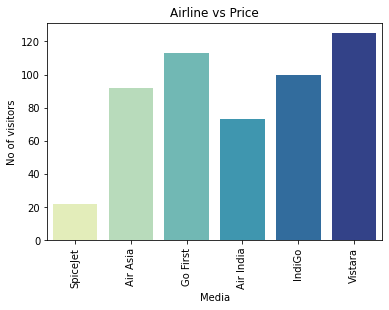

In [80]:
sns.countplot(x='AIRLINE NAME ',data=data,palette='YlGnBu')
plt.title("Airline vs Price")
plt.xlabel("Media")
plt.ylabel("No of visitors")
plt.xticks(rotation=90)
plt.show()

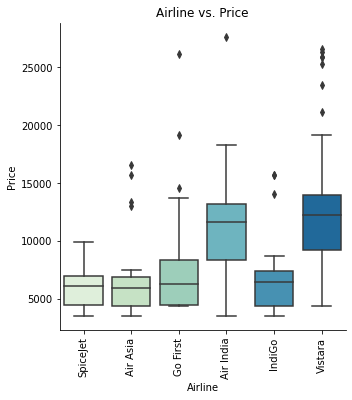

In [81]:
sns.catplot(data=data[['AIRLINE NAME ','PRICE']],x='AIRLINE NAME ',y='PRICE',kind='box',palette='GnBu')
plt.ylabel("Price")
plt.xlabel("Airline")
plt.title("Airline vs. Price")
plt.xticks(rotation=90)
plt.show()

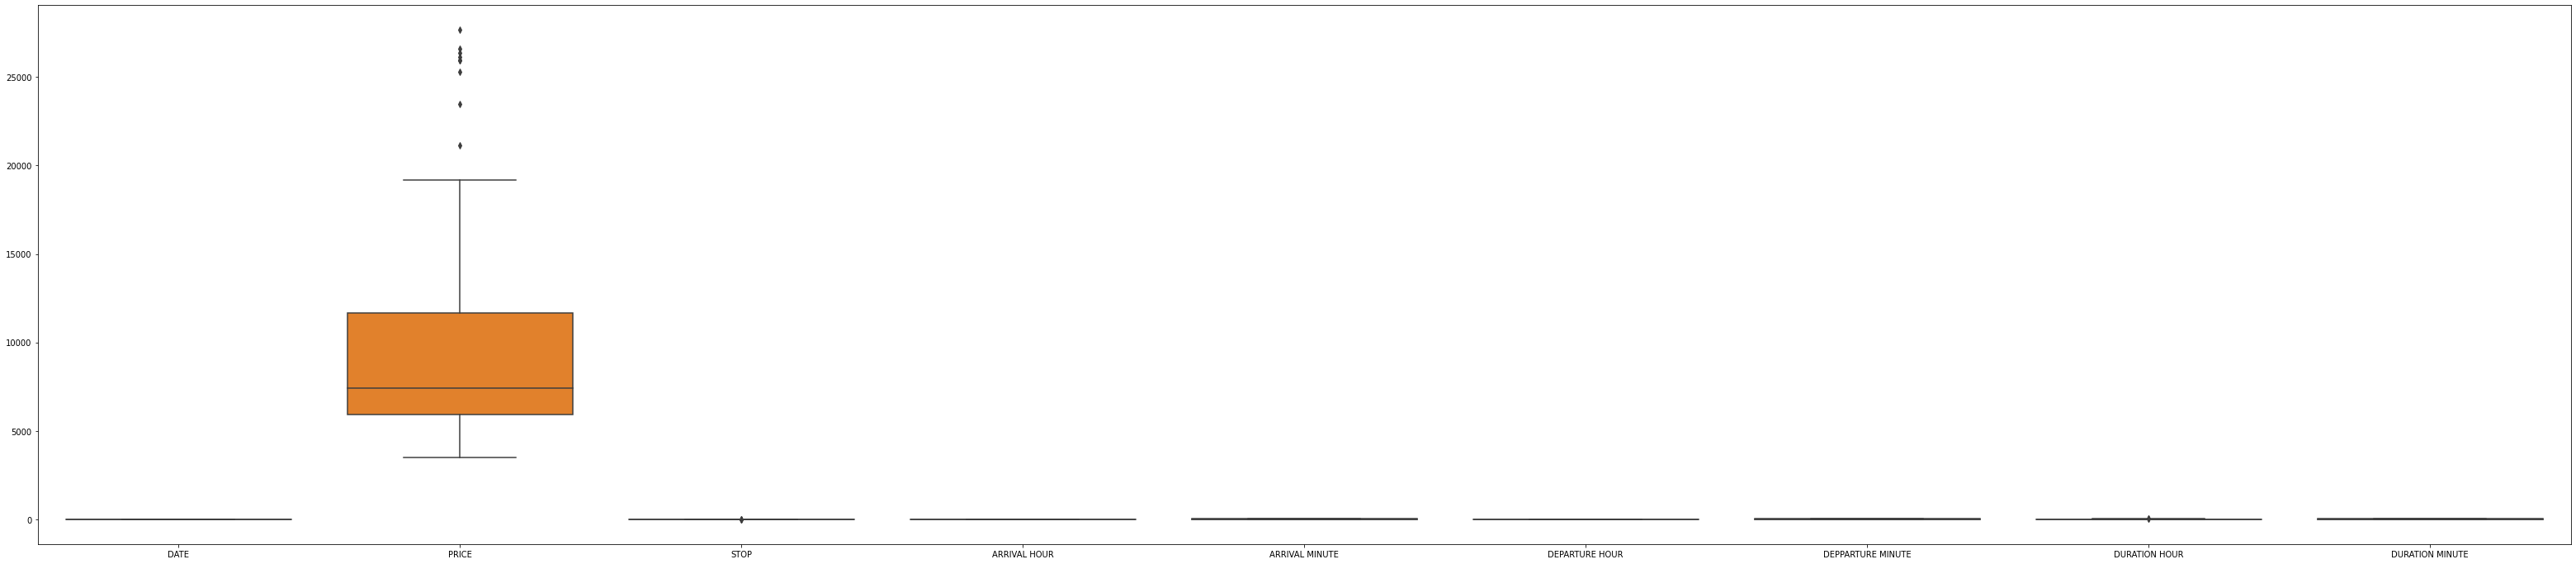

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331bdab590>,
      dtype=object)

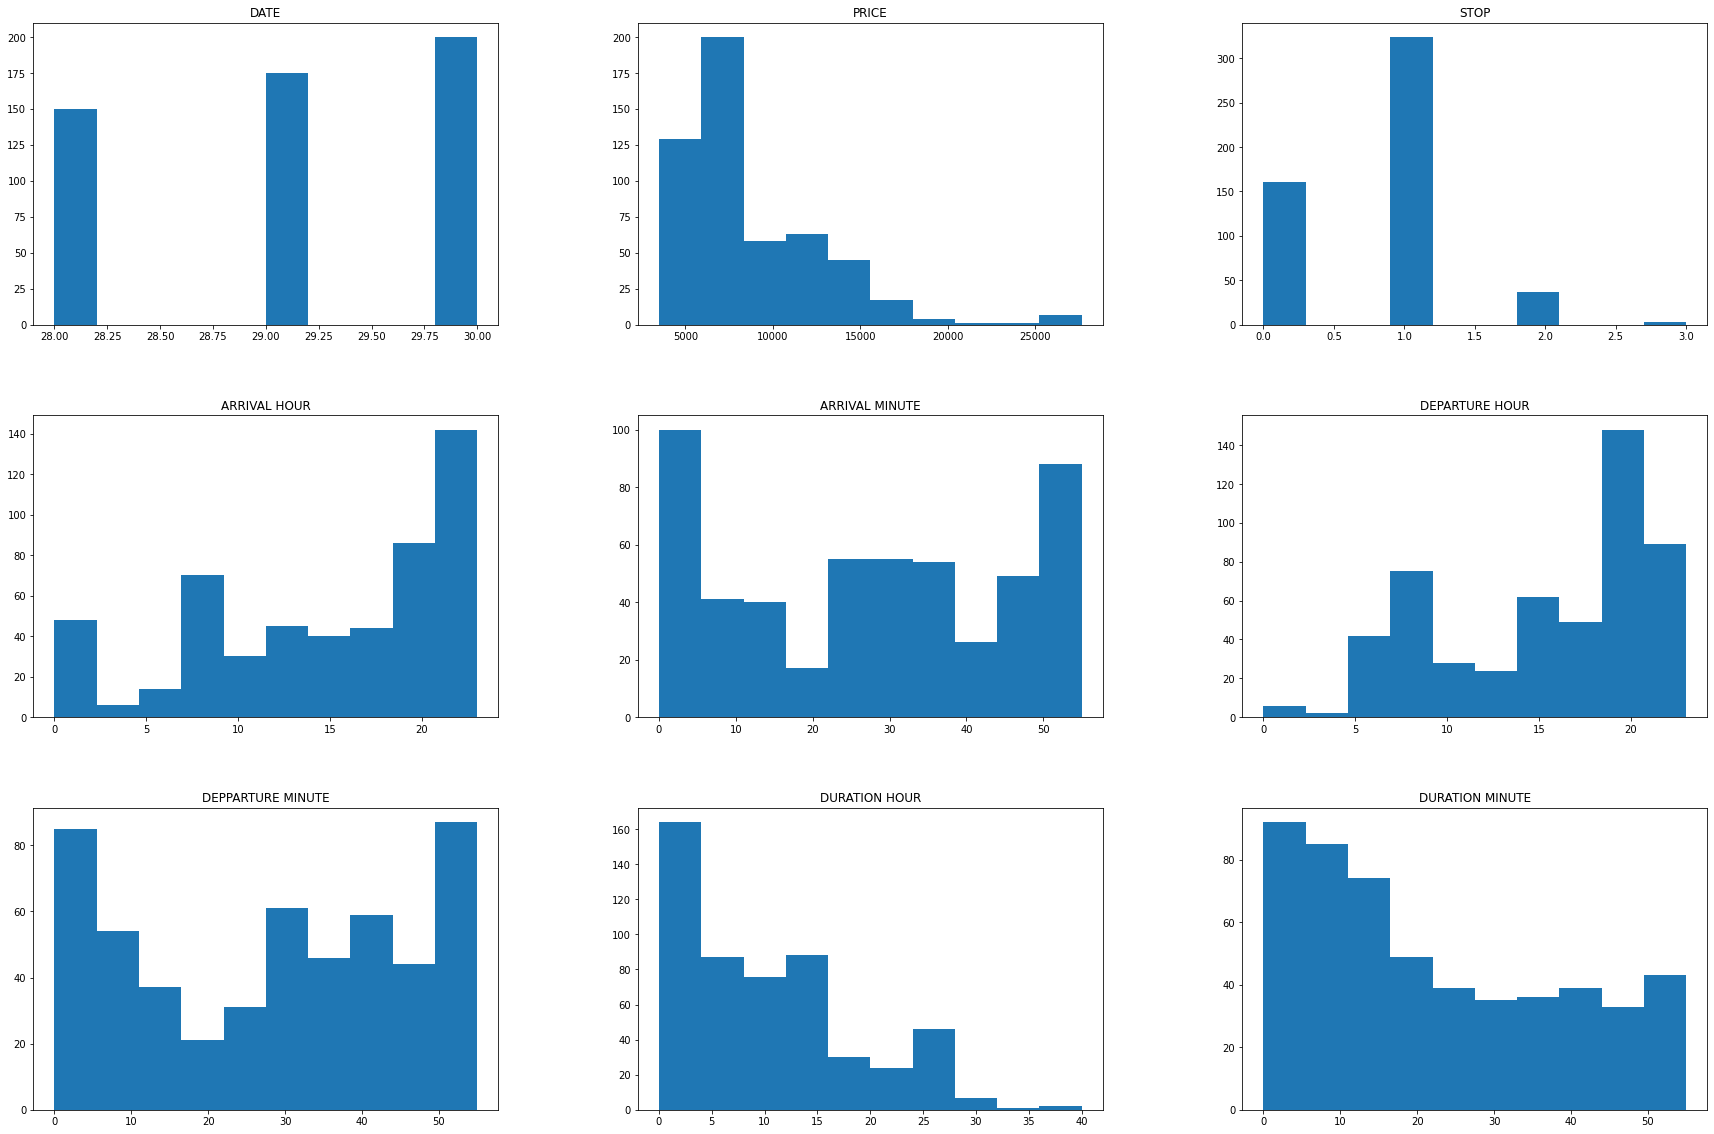

In [83]:
data.hist(figsize = (30,20), grid = False)

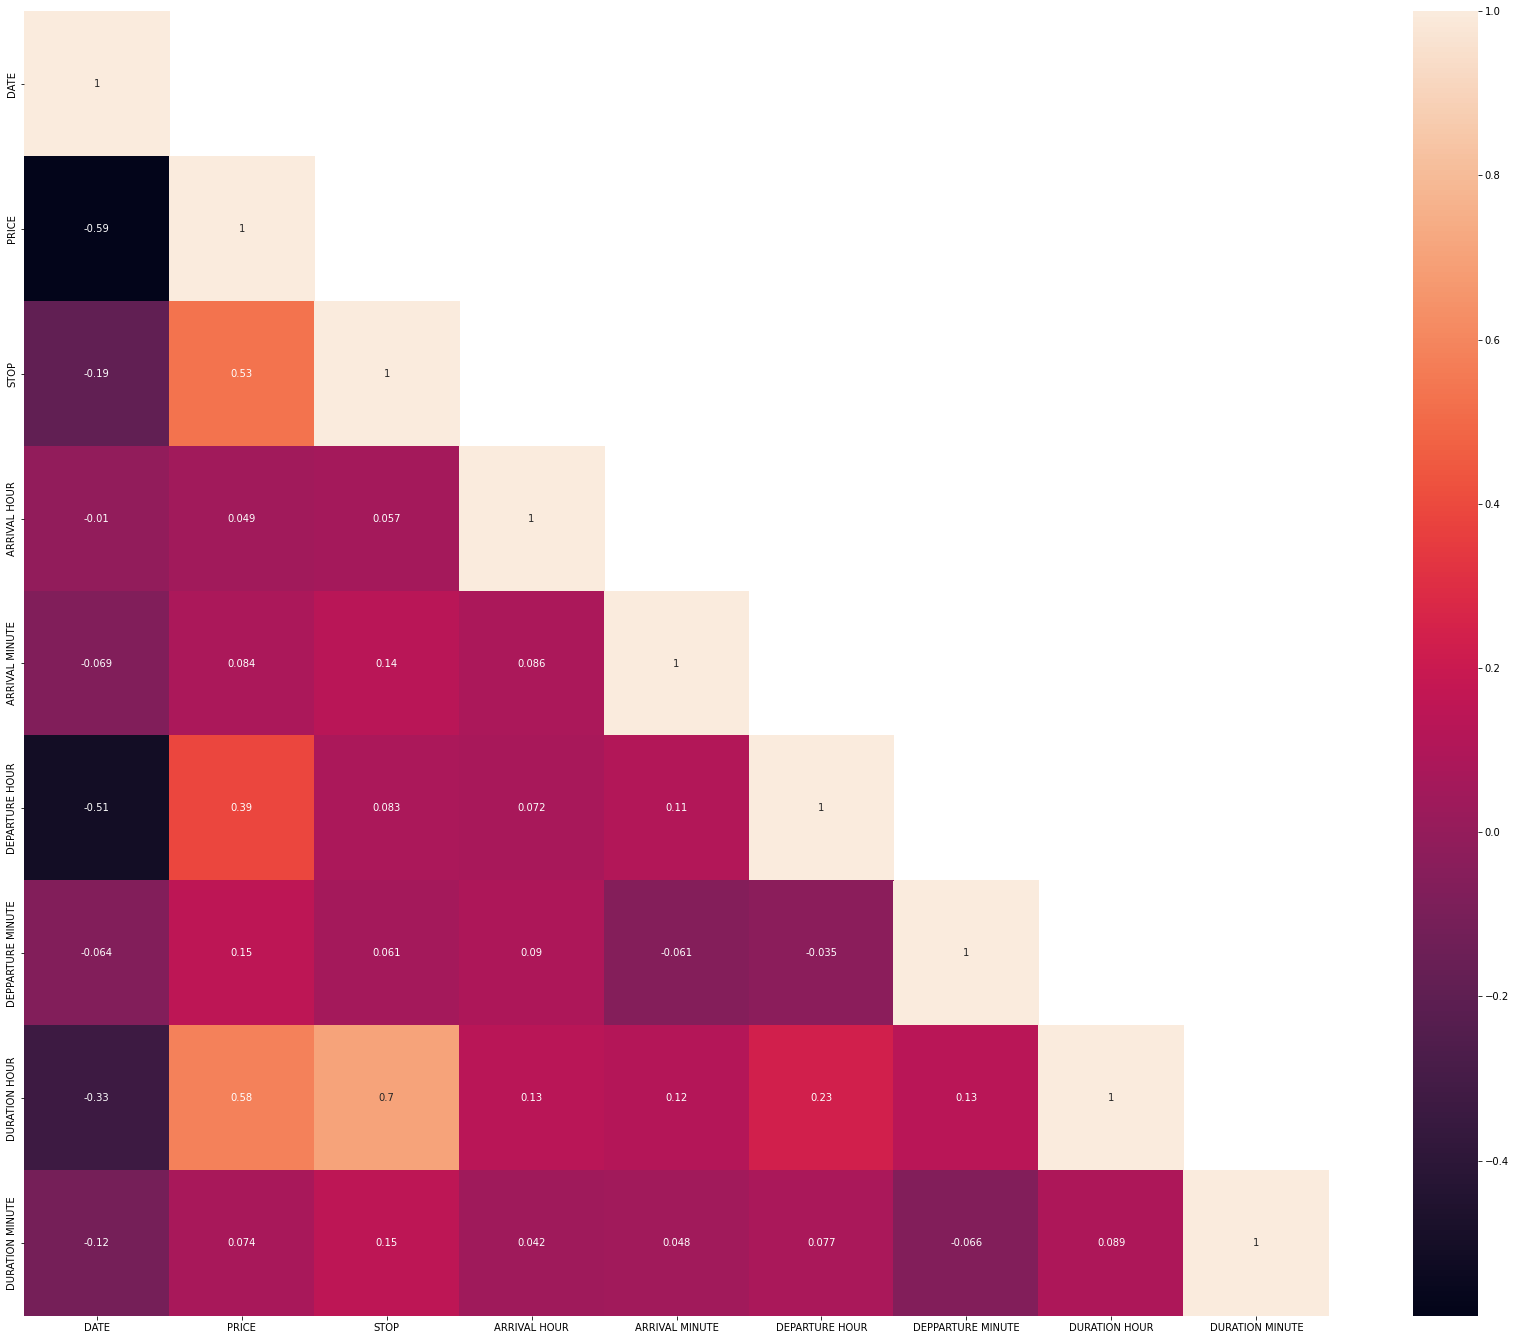

In [84]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
data['AIRLINE NAME ']=le.fit_transform(data['AIRLINE NAME '])
data['SOURCE']=le.fit_transform(data['SOURCE'])
data['DESTINATIION']=le.fit_transform(data['DESTINATIION'])

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AIRLINE NAME       525 non-null    int64
 1   SOURCE             525 non-null    int64
 2   DESTINATIION       525 non-null    int64
 3   DATE               525 non-null    int64
 4   PRICE              525 non-null    int64
 5   STOP               525 non-null    int64
 6   ARRIVAL HOUR       525 non-null    int64
 7   ARRIVAL MINUTE     525 non-null    int64
 8   DEPARTURE HOUR     525 non-null    int64
 9   DEPPARTURE MINUTE  525 non-null    int64
 10  DURATION HOUR      525 non-null    int64
 11  DURATION MINUTE    525 non-null    int64
dtypes: int64(12)
memory usage: 49.3 KB


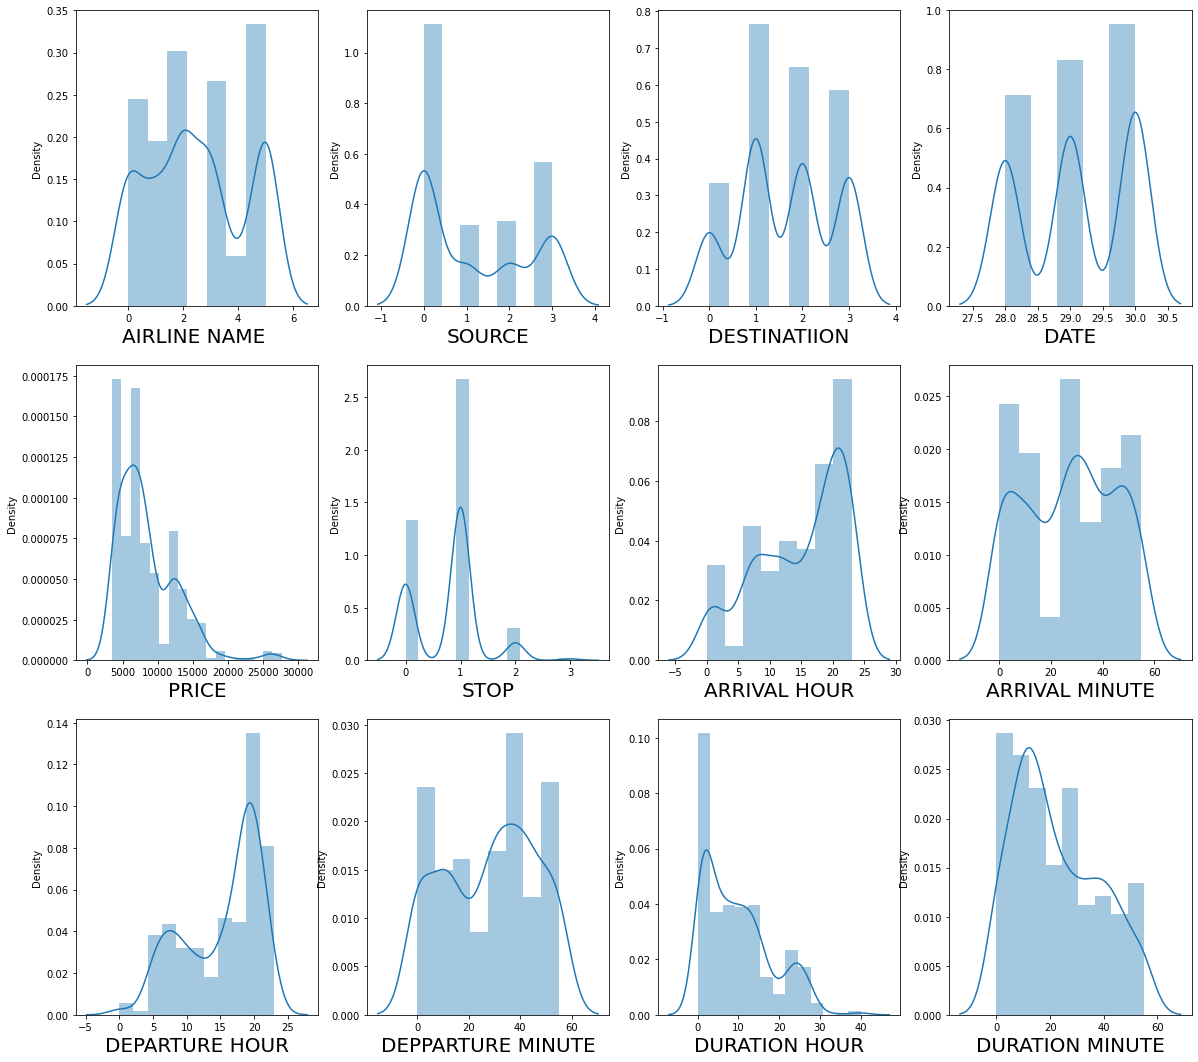

In [89]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=15:
    ax = plt.subplot(4,4,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

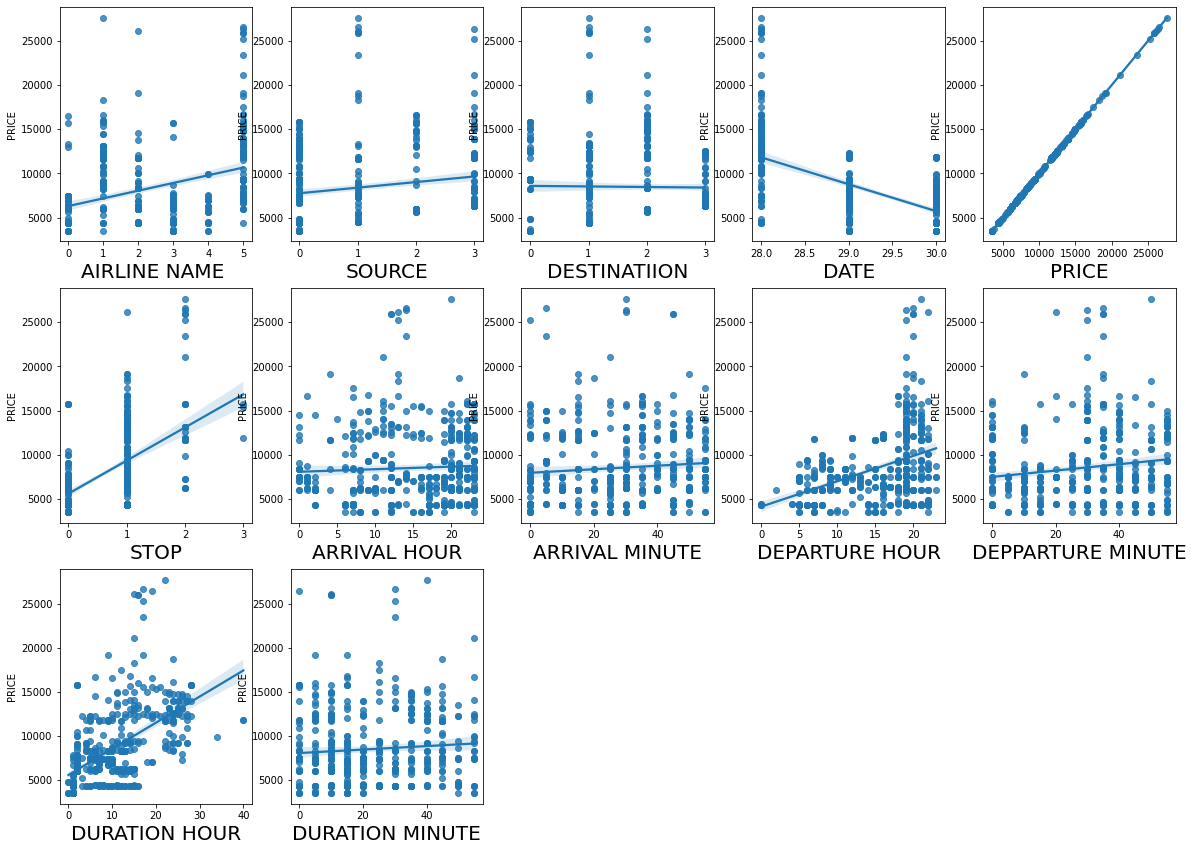

In [91]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=25:
    ax = plt.subplot(5,5,graph)
    sns.regplot(x = data[column], y = 'PRICE', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

In [107]:
data.drop(columns = ['DURATION MINUTE','DEPPARTURE MINUTE', 'ARRIVAL MINUTE', 'ARRIVAL HOUR'],axis=1, inplace = True)

In [108]:
#Treating the outliers

# findingout the quantile of data 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", df.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-df.shape[0])/data.shape[0])

shape before and after
shape before         : (525, 8)
shape after          : (511, 8)
Percentage Loss      : 0.02666666666666667


In [109]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(data)

In [110]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,AIRLINE NAME,1.374679
1,SOURCE,1.475758
2,DESTINATIION,1.408579
3,DATE,1.965836
4,PRICE,2.982482
5,STOP,2.674335
6,DEPARTURE HOUR,1.420518
7,DURATION HOUR,2.561098


In [111]:
#Model Building

X = df.drop('PRICE', axis = 1)
Y = df['PRICE']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,r2 score,MSE
0,LR,0.533972,4.481952e+06
1,RF,0.891623,1.042297e+06
2,KNN,0.522083,4.596290e+06
3,GB,0.859251,1.353635e+06


In [113]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, Y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,LR,0.409557
1,RF,0.539626
2,KNN,0.487071
3,GB,0.572056


In [114]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.533972,0.409557,0.124415
1,RF,0.891623,0.539626,0.351997
2,KNN,0.522083,0.487071,0.035012
3,GB,0.859251,0.572056,0.287195


In [115]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_neighbors' : range(2,10,2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(20,40)
}

In [116]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid = grid_param)

In [117]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40),
                         'n_neighbors': range(2, 10, 2),
                         'weights': ['uniform', 'distance']})

In [118]:
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 6, 'weights': 'distance'}


In [119]:
#FINAL MODEL
#Substituting the best parameters in the  KNEIGHBORSRegressor:

knn =  KNeighborsRegressor(algorithm = 'auto', leaf_size = 21, n_neighbors = 6, weights = 'distance')

knn.fit(X_train, y_train)
pred = knn.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.5365113872391727

In [120]:
#SAVING THE MODEL:

import joblib
joblib.dump(knn, 'flight_price_regression.pkl')

['flight_price_regression.pkl']